In [40]:
import faces
import os
import random
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import mrcnn.model as modellib
import mrcnn.visualize as visualize
import mrcnn.config as config
import mrcnn.utils as utils
from matplotlib import image

In [3]:
Faces_config = faces.FacesConfig()
Infer_config = faces.FacesInferConfig()

In [4]:
images_list = os.listdir(faces.DATASET_PATH)

random.seed(10)
random.shuffle(images_list)
val_size = 30

images_val = images_list[:val_size]
images_train = images_list[val_size:]
print(len(images_train), len(images_val))

70 30


In [5]:
weights_path = os.path.abspath('./models/faces20220829T2146/mask_rcnn_faces_0009.h5')
model_infer = faces.load_model(Infer_config, weights_path, mode='inference')

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
Use tf.cast instead.
Re-starting from epoch 9


In [6]:
# Training set
fp = os.path.join(faces.ANNOTS_PATH, 'polygons_100.json')
dataset_train = faces.FacesDataset(images_train, fp, faces.DATASET_PATH)
dataset_train.prepare()

In [7]:
# Validation set
dataset_val = faces.FacesDataset(images_val, fp, faces.DATASET_PATH)
dataset_val.prepare()

In [8]:
def get_ax(rows=1, cols=1, size=12):
    _, ax  = plt.subplots(rows, cols, figsize=(size*cols, size*rows))
    return ax

In [25]:
image_id = random.choice(dataset_val.image_ids)
image, image_meta, gt_class_id, gt_bbox, gt_mask =\
  modellib.load_image_gt(dataset_val, Infer_config, image_id, use_mini_mask=True)
info = dataset_val.image_info[image_id]
print("image ID: {}.{} ({}) {}".format(info['source'], info['id'], image_id,
                                        dataset_val.image_reference(image_id)))

output = model_infer.detect([image], verbose=1)
results = output[0]
print("Dictionary Keys", results.keys(), end='\n\n')
print("Bounding Boxes:\n", results['rois'], end='\n\n')
print("Class IDs:\n", np.array(dataset_val.class_names)[results['class_ids']], end="\n\n")
print("Prediction Scores:\n", results['scores'], end="\n\n")

image ID: Faces.17 (7) E:\PersonalProjects\FaceDetect\images\labeled\image_15.jpeg
Processing 1 images
image                    shape: (256, 256, 3)         min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 256, 256, 3)      min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 16)               min:    0.00000  max:  256.00000  int32
anchors                  shape: (1, 16368, 4)         min:   -1.41976  max:    2.16878  float32
Dictionary Keys dict_keys(['rois', 'class_ids', 'scores', 'masks'])

Bounding Boxes:
 [[101 121 159 152]
 [174 117 181 156]]

Class IDs:
 ['nose' 'mouth']

Prediction Scores:
 [0.99982375 0.9988607 ]



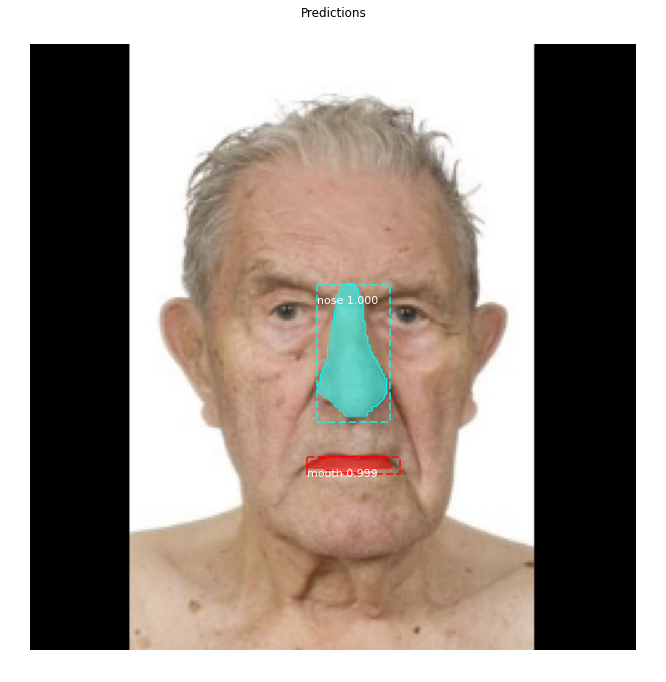

In [26]:
ax = get_ax(1)
r = results

x = visualize.display_instances(image, r['rois'], r['masks'], r['class_ids'],
                            dataset_val.class_names, r['scores'], ax=ax,
                            title = 'Predictions')

In [111]:
img_path = 'images/Me.jpg'
img = image.imread(img_path)
pred = model_infer.detect([frame], verbose=1)

Processing 1 images
image                    shape: (720, 1280, 3)        min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 256, 256, 3)      min: -123.70000  max:  150.10000  float64
image_metas              shape: (1, 16)               min:    0.00000  max: 1280.00000  float64
anchors                  shape: (1, 16368, 4)         min:   -1.41976  max:    2.16878  float32


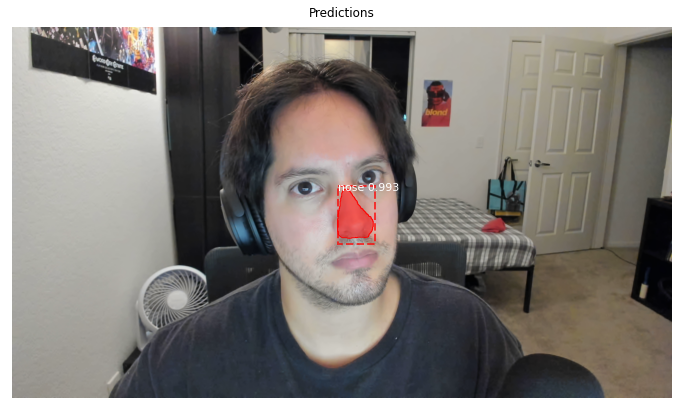

In [112]:
ax = get_ax(1)
r = pred[0]

visualize.display_instances(frame, r['rois'], r['masks'], r['class_ids'],
                            dataset_val.class_names, r['scores'], ax=ax,
                            title = 'Predictions')

In [108]:
import cv2 as cv

In [109]:
cap = cv.VideoCapture(0, cv.CAP_DSHOW)
w = 1280
h = 600
cap.set(3,w)
cap.set(4,h)

while cap.isOpened():
    success, frame = cap.read()
    if not success:
        print("Ignoring Empty camera frame")
        break
    #frame = cv.cvtColor(frame, cv.COLOR_BGR2RGB)
        
    pred = model_infer.detect([frame], verbose=0)
    try:
        mask = pred[0]['masks']
        frame = cv.draw_Contours(frame, mask)
    except:
        pass
        
        
    
    cv.imshow('Scan', frame)
    if cv.waitKey(1) & 0xFF == ord('q'):
        break
cap.release()
cv.destroyAllWindows()
cv.waitKey(1)

-1